<a href="https://colab.research.google.com/github/Hebaehab765/AI4GoodLab/blob/main/Module_1_Intro_to_ML_FridayProject_BMI_income_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1 Group Project - Global Health Analytics

Team: Sohana, Ipsa, Heba, Salma
TA: Afia


Topic: BMI and correlation to income


Question:
Does income group affect BMI in adults? Does having a high income group lead to high BMI?

Datasets:
[Prevalence of overweight among adults, BMI ≥ 25, crude Estimates by World Bank income group - WHO](https://apps.who.int/gho/data/view.main.BMI25CWBv?lang=en)


In [ ]:
import numpy as np # linear algebra and preprocessing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/qdrive')

train_df = pd.read_csv('/content/qdrive/My Drive/Week 1 Group Project/data.csv')
train_df.head(n=8)


Drive already mounted at /content/qdrive; to attempt to forcibly remount, call drive.mount("/content/qdrive", force_remount=True).


,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...",...,"Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr...","Prevalence of overweight among adults, BMI &Gr..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,World Bank income group,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Global,39.1 [37.7-40.5],38.5 [36.5-40.6],39.7 [37.8-41.6],38.4 [37.1-39.8],37.8 [35.9-39.7],39.0 [37.3-40.8],37.7 [36.6-39.0],37.1 [35.4-38.9],38.4 [36.8-40.1],...,22.6 [20.4-24.8],20.8 [19.2-22.4],19.3 [17.1-21.6],22.3 [20.1-24.6],20.5 [18.9-22.2],19.0 [16.7-21.4],22.0 [19.7-24.4],20.2 [18.5-22.0],18.7 [16.4-21.2],21.7 [19.4-24.3]
4,Low-income,22.8 [21.1-24.6],17.0 [14.6-19.5],28.5 [25.9-31.1],22.3 [20.7-24.0],16.6 [14.4-18.9],27.8 [25.5-30.3],21.8 [20.3-23.3],16.2 [14.2-18.4],27.2 [25.0-29.5],...,11.1 [8.4-14.2],8.7 [6.8-10.9],6.5 [4.2-9.7],10.8 [8.1-14.0],8.4 [6.6-10.7],6.3 [4.0-9.6],10.4 [7.7-13.8],8.2 [6.3-10.5],6.1 [3.8-9.6],10.1 [7.4-13.6]
5,Lower-middle-income,26.1 [24.4-28.0],23.2 [20.7-25.9],29.0 [26.6-31.5],25.4 [23.8-27.1],22.5 [20.3-25.0],28.3 [26.1-30.6],24.7 [23.2-26.3],21.9 [19.8-24.1],27.7 [25.6-29.8],...,12.5 [10.5-14.8],10.2 [8.8-11.8],8.3 [6.4-10.5],12.3 [10.2-14.7],10.0 [8.6-11.7],8.1 [6.2-10.4],12.0 [9.9-14.5],9.8 [8.3-11.5],7.9 [6.0-10.3],11.8 [9.7-14.4]
6,Upper-middle-income,44.3 [42.1-46.8],44.4 [40.9-48.0],44.3 [41.3-47.5],43.4 [41.3-45.7],43.3 [40.1-46.7],43.5 [40.7-46.4],42.5 [40.5-44.6],42.2 [39.2-45.4],42.7 [40.1-45.4],...,23.2 [20.4-26.3],19.9 [17.9-22.1],17.0 [14.1-20.1],22.9 [20.0-26.1],19.6 [17.4-21.9],16.6 [13.7-19.9],22.6 [19.5-25.9],19.3 [17.0-21.7],16.3 [13.2-19.7],22.3 [19.0-25.7]
7,High-income,60.3 [58.7-61.9],65.4 [63.1-67.7],55.4 [53.0-57.7],59.8 [58.2-61.3],64.8 [62.6-67.0],54.9 [52.7-57.1],59.2 [57.7-60.6],64.2 [62.2-66.2],54.4 [52.3-56.4],...,35.6 [32.4-38.7],37.2 [34.7-39.6],39.5 [36.0-43.3],35.1 [31.9-38.4],36.7 [34.2-39.2],38.9 [35.2-42.9],34.7 [31.3-38.1],36.2 [33.5-38.9],38.3 [34.4-42.4],34.3 [30.7-37.9]


In [ ]:
train_df.shape

(8, 127)

In [ ]:
train_df = train_df.drop(index=[0,1])
#train_df = train_df.drop(index=1)
train_df.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
2,World Bank income group,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Global,39.1 [37.7-40.5],38.5 [36.5-40.6],39.7 [37.8-41.6],38.4 [37.1-39.8],37.8 [35.9-39.7],39.0 [37.3-40.8],37.7 [36.6-39.0],37.1 [35.4-38.9],38.4 [36.8-40.1],...,22.6 [20.4-24.8],20.8 [19.2-22.4],19.3 [17.1-21.6],22.3 [20.1-24.6],20.5 [18.9-22.2],19.0 [16.7-21.4],22.0 [19.7-24.4],20.2 [18.5-22.0],18.7 [16.4-21.2],21.7 [19.4-24.3]
4,Low-income,22.8 [21.1-24.6],17.0 [14.6-19.5],28.5 [25.9-31.1],22.3 [20.7-24.0],16.6 [14.4-18.9],27.8 [25.5-30.3],21.8 [20.3-23.3],16.2 [14.2-18.4],27.2 [25.0-29.5],...,11.1 [8.4-14.2],8.7 [6.8-10.9],6.5 [4.2-9.7],10.8 [8.1-14.0],8.4 [6.6-10.7],6.3 [4.0-9.6],10.4 [7.7-13.8],8.2 [6.3-10.5],6.1 [3.8-9.6],10.1 [7.4-13.6]
5,Lower-middle-income,26.1 [24.4-28.0],23.2 [20.7-25.9],29.0 [26.6-31.5],25.4 [23.8-27.1],22.5 [20.3-25.0],28.3 [26.1-30.6],24.7 [23.2-26.3],21.9 [19.8-24.1],27.7 [25.6-29.8],...,12.5 [10.5-14.8],10.2 [8.8-11.8],8.3 [6.4-10.5],12.3 [10.2-14.7],10.0 [8.6-11.7],8.1 [6.2-10.4],12.0 [9.9-14.5],9.8 [8.3-11.5],7.9 [6.0-10.3],11.8 [9.7-14.4]
6,Upper-middle-income,44.3 [42.1-46.8],44.4 [40.9-48.0],44.3 [41.3-47.5],43.4 [41.3-45.7],43.3 [40.1-46.7],43.5 [40.7-46.4],42.5 [40.5-44.6],42.2 [39.2-45.4],42.7 [40.1-45.4],...,23.2 [20.4-26.3],19.9 [17.9-22.1],17.0 [14.1-20.1],22.9 [20.0-26.1],19.6 [17.4-21.9],16.6 [13.7-19.9],22.6 [19.5-25.9],19.3 [17.0-21.7],16.3 [13.2-19.7],22.3 [19.0-25.7]


In [ ]:
train_df = train_df.drop(train_df.columns[4:127], axis=1)
train_df.head(n=20)

,Unnamed: 0,2016,2016.1,2016.2
2,World Bank income group,Both sexes,Male,Female
3,Global,39.1 [37.7-40.5],38.5 [36.5-40.6],39.7 [37.8-41.6]
4,Low-income,22.8 [21.1-24.6],17.0 [14.6-19.5],28.5 [25.9-31.1]
5,Lower-middle-income,26.1 [24.4-28.0],23.2 [20.7-25.9],29.0 [26.6-31.5]
6,Upper-middle-income,44.3 [42.1-46.8],44.4 [40.9-48.0],44.3 [41.3-47.5]
7,High-income,60.3 [58.7-61.9],65.4 [63.1-67.7],55.4 [53.0-57.7]


In [ ]:
train_df.columns.tolist()

new_header = train_df.iloc[0].to_list()
train_df.columns = new_header
train_df.columns.tolist()

train_df2 = pd.melt(train_df,
                   id_vars=['World Bank income group'],
                   value_vars=['Both sexes', 'Male', 'Female'],
                   var_name='Gender',
                   value_name='BMI')

train_df2.head(n=100)
#train_df2.shape

,World Bank income group,Gender,BMI
0,World Bank income group,Both sexes,Both sexes
1,Global,Both sexes,39.1 [37.7-40.5]
2,Low-income,Both sexes,22.8 [21.1-24.6]
3,Lower-middle-income,Both sexes,26.1 [24.4-28.0]
4,Upper-middle-income,Both sexes,44.3 [42.1-46.8]
5,High-income,Both sexes,60.3 [58.7-61.9]
6,World Bank income group,Male,Male
7,Global,Male,38.5 [36.5-40.6]
8,Low-income,Male,17.0 [14.6-19.5]
9,Lower-middle-income,Male,23.2 [20.7-25.9]


In [ ]:
rows_to_drop= [0,6,12]
train_df3 = train_df2.drop(index=rows_to_drop)
train_df3.head(n=20)

,World Bank income group,Gender,BMI
1,Global,Both sexes,39.1 [37.7-40.5]
2,Low-income,Both sexes,22.8 [21.1-24.6]
3,Lower-middle-income,Both sexes,26.1 [24.4-28.0]
4,Upper-middle-income,Both sexes,44.3 [42.1-46.8]
5,High-income,Both sexes,60.3 [58.7-61.9]
7,Global,Male,38.5 [36.5-40.6]
8,Low-income,Male,17.0 [14.6-19.5]
9,Lower-middle-income,Male,23.2 [20.7-25.9]
10,Upper-middle-income,Male,44.4 [40.9-48.0]
11,High-income,Male,65.4 [63.1-67.7]


In [ ]:
train_df3.dtypes

,0
World Bank income group,object
Gender,object
BMI,object


In [ ]:
#train_dfencoded = pd.get_dummies(train_df3, columns=['World Bank income group', 'Gender'])
train_df3['BMI']= train_df3['BMI'].str.split('[',  expand=True)[0]
train_df3['BMI'] = train_df3['BMI'].astype(float)
train_df3.head()

,World Bank income group,Gender,BMI
1,Global,Both sexes,39.1
2,Low-income,Both sexes,22.8
3,Lower-middle-income,Both sexes,26.1
4,Upper-middle-income,Both sexes,44.3
5,High-income,Both sexes,60.3


In [ ]:
train_df3.dtypes

,0
World Bank income group,object
Gender,object
BMI,float64


Text(0.5, 1.0, 'BMI and Gender')

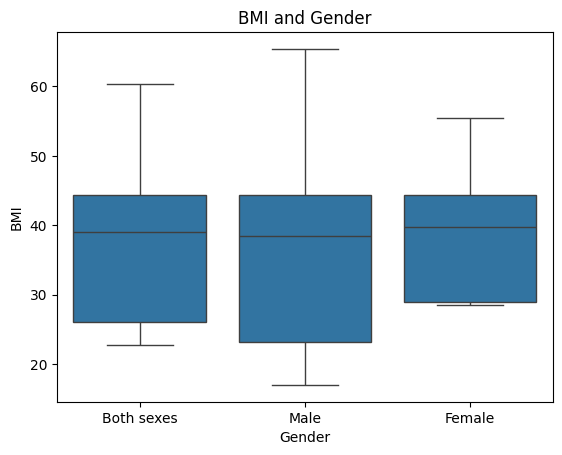

In [ ]:
sns.boxplot(x='Gender', y='BMI', data=train_df3)
plt.title("BMI and Gender")

Text(0.5, 1.0, 'BMI and Income')

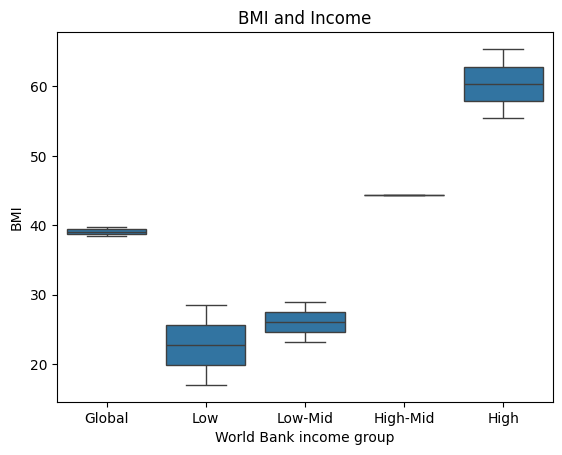

In [ ]:
sns.boxplot(x='World Bank income group', y='BMI', data=train_df3)

plt.xticks(ticks=[0,1,2,3,4], labels=['Global', 'Low', 'Low-Mid','High-Mid','High'])
plt.title('BMI and Income')